In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [2]:
## Generating Binary Classification Dataset

x,y = make_moons(n_samples=250, noise=0.25, random_state=1)

In [3]:
x

array([[-0.13249283,  0.79819677],
       [ 2.31843898,  0.99177544],
       [ 1.42186457,  0.34604436],
       [ 0.79480671, -0.20627281],
       [-0.97020185,  0.95784991],
       [ 1.76079819, -0.2428572 ],
       [-0.20634621,  1.1325037 ],
       [ 2.12685472, -0.02683228],
       [ 0.95372432, -0.77040037],
       [ 1.19533458,  0.11281015],
       [ 1.93767258,  0.29814377],
       [ 1.24255425, -0.31207617],
       [-0.84716361,  0.23572382],
       [ 0.89311669, -0.33739211],
       [ 0.05940713,  0.61998868],
       [-0.47188505,  0.31024837],
       [ 1.18377304,  0.049632  ],
       [ 0.38543722,  0.93637792],
       [ 0.74090447,  0.60217849],
       [-0.27074376,  0.68091205],
       [ 1.69148983, -0.32052492],
       [ 0.71357227,  0.68459783],
       [-0.61821075,  0.62670905],
       [ 1.22125108, -0.4462956 ],
       [-0.44719439, -0.37292191],
       [-1.15371635,  0.35171032],
       [ 2.62919434,  0.36190819],
       [ 1.97899437,  0.19276891],
       [ 0.90413249,

In [4]:
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

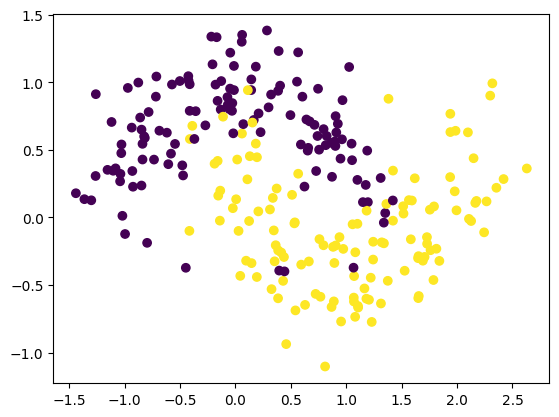

In [5]:
## Data Visualization

plt.scatter(x[:,0], x[:,1],c=y)

# Constant Weight Initialization with 'relu' as activation function

In [6]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
## Checking the Initial Weigths

model.get_weights()

[array([[ 0.56992817,  0.49196255],
        [-0.42527223, -1.0755395 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9504347],
        [ 0.6387254]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
## Setting the weights to 0.5

initial_weights = model.get_weights()

In [9]:

initial_weights[0]= np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]= np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]= np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]= np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

In [10]:
## Checking the result

model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

Weights are set with contact value =0.5

In [11]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2 , verbose =0  )

In [12]:
## Checking the weights posting training

model.get_weights()

[array([[0.83609444, 0.83609444],
        [0.01651981, 0.01651981]], dtype=float32),
 array([0.22499825, 0.22499825], dtype=float32),
 array([[0.30875233],
        [0.30875233]], dtype=float32),
 array([-0.00255273], dtype=float32)]

As observed post training the weights in each layers are similar, so model will act as linear model and unable to captue the non-linearity of the data.

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

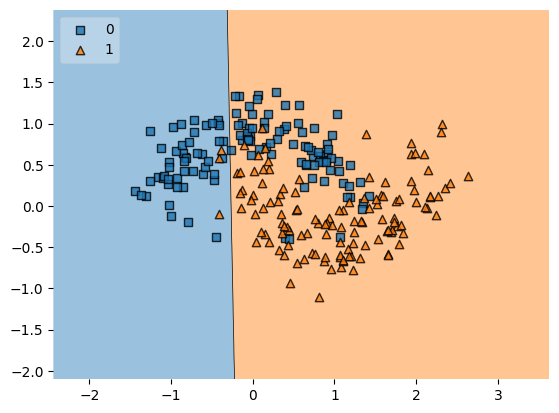

In [14]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

 Model act as Linear Model

# Constant Weigth Initialization with 'tanh' as activation fucntion

In [16]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
## Checking the Initial Weigths

model.get_weights()

[array([[0.32419372, 0.16033041],
        [1.2206069 , 0.39684582]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 1.2740992],
        [-1.2980915]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
## Setting the inital weights to 0.5

initial_weights = model.get_weights()
initial_weights[0]= np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]= np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]= np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]= np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

In [19]:
## Checking the result

model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

Weights are set to contact value of 0.5

In [20]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2, verbose=0 )

In [21]:
## Checking the weights after training

model.get_weights()

[array([[ 0.9096063 ,  0.9096063 ],
        [-0.17817678, -0.17817678]], dtype=float32),
 array([-0.05185337, -0.05185337], dtype=float32),
 array([[0.55696225],
        [0.55696225]], dtype=float32),
 array([0.02451034], dtype=float32)]

As observed post training the weights in each layers are similar, so model will act as linear model and unable to captue the non-linearity of the data.

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

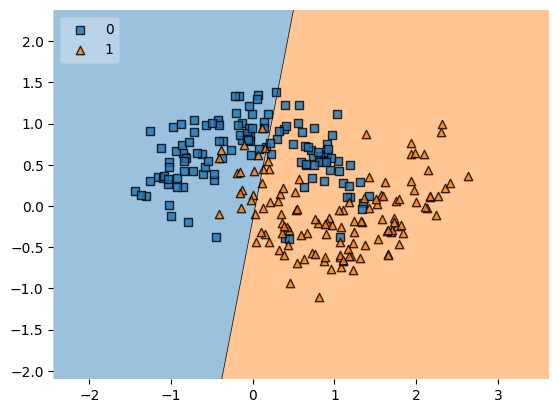

In [22]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

Model act as Linear Model

# Constant Weigth Initialization with 'Sigmoid' as activation fucntion

In [23]:
## Buulding ANN

model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
## Checking the Initial Weigths

model.get_weights()

[array([[ 0.2688266 , -0.5464361 ],
        [ 0.30243862, -0.34768206]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00527978],
        [-0.14332557]], dtype=float32),
 array([0.], dtype=float32)]

In [25]:
## Setting the inital weights to 0.5

initial_weights = model.get_weights()
initial_weights[0]= np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]= np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2]= np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3]= np.ones(model.get_weights()[3].shape)*0.5

model.set_weights(initial_weights)

In [26]:
## Checking the result

model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

Weights are Set to contact value of 0.5

In [27]:
## Training the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x,y, epochs= 100, validation_split = 0.2, verbose=0 )

In [28]:
## Checking the weights after training

model.get_weights()

[array([[0.983599 , 0.983599 ],
        [0.0110468, 0.0110468]], dtype=float32),
 array([0.11405107, 0.11405107], dtype=float32),
 array([[0.17953736],
        [0.17953736]], dtype=float32),
 array([0.04120533], dtype=float32)]

As observed post training the weights in each layers are similar, so model will act as linear model and unable to captue the non-linearity of the data.

9600/9600 [==============================] - 16s 2ms/step


<Axes: >

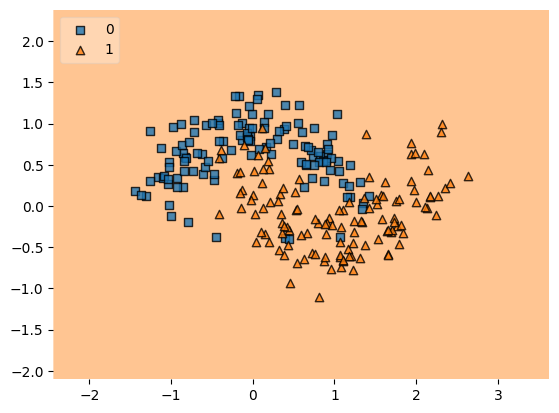

In [30]:
# Checking the decsion boundaries

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x,y, clf =model, legend =2)

Model indicating all belongs to class 1, Hence Model fail to train